**A1**

In [1]:
#importing Pandas and Numpy
import pandas as pd
import numpy as np

#Loadindkishor_c excel file and Used 'r' to avoid unicode error
file_path = 'Lab Session Data.xlsx'

# Read all sheets from the Excel file
dataframe = pd.read_excel(file_path, sheet_name=None)

dataframe

# Extract the Purchase Data dataframe
purchases_data = dataframe['Purchase data']

# Display the head of the dataframe to understand its structure
print(purchases_data.iloc[:, [0, 1, 2, 3, 4]])
print()

# Segregate the data into matrices A and C
# Matrix A will consist of the features (Candies, Mangoes, Milk Packets)
# Matrix C will consist of the target variable (Payment)
A = purchases_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
C = purchases_data[['Payment (Rs)']].values


# Check the shapes of A and C
shape_of_A = A.shape
shape_of_C= C.shape

# Print the shapes of A and C
print('Shape of Matrix A:', shape_of_A)
print('Shape of Matrix C:', shape_of_C)

# Calculate the dimensionality of the vector space
dimensionality_of_vector = shape_of_A[1]  # Number of columns in A

# Calculate the number of vectors in the vector space
number_of_vectors = shape_of_A[0]  # Number of rows in A

# Calculate the rank of Matrix A
rank_of_A = np.linalg.matrix_rank(A)

# Calculate the pseudo-inverse of Matrix A
pseudo_inverse_of_A = np.linalg.pinv(A)

# Calculate the cost of each product available for sale using the pseudo-inverse
costs = pseudo_inverse_of_A @ C


# Print the outputs
print('Dimensionality of the vector space:', dimensionality_of_vector)
print('Number of vectors in the vector space:', number_of_vectors)
print('Rank of Matrix A:', rank_of_A)
print('Cost of each product available for sale:\n', costs)
print()

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198

Shape of Matrix A: (10, 3)
Shape of Matrix C: (10, 1)
Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3
Cost of each product available for sale:
 [[ 1.]
 [55.]
 [18.]]



**A2**

In [2]:
# Calculate the model vector X for predicting the cost of the products available with the vendor
X = pseudo_inverse_of_A @ C

# Print the model vector X
print('The required model vector for predicting the cost of the products is :\n', X)

The required model vector for predicting the cost of the products is :
 [[ 1.]
 [55.]
 [18.]]


**A3**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Mark customers as RICH or POOR
purchases_data['Customer Class'] = np.where(purchases_data['Payment (Rs)'] > 200, 'RICH', 'POOR')

# Prepare the data for classification
X = purchases_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
y = purchases_data['Customer Class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the classifier model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict the class for the test set
y_pred = classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        POOR       0.67      1.00      0.80         2
        RICH       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/home/jaykishor_c/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jaykishor_c/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jaykishor_c/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**A4**

In [4]:
#from original dataframne taking the IRCTC Stock Price table
IRCTC_Stock_Price = dataframe['IRCTC Stock Price']
#displaying the first 10 data from IRCTC Stock Price tables
IRCTC_Stock_Price.head(10)

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
5,"Jun 22, 2021",Jun,Tue,2083.00,2100.00,2128.35,2075.00,1.29M,0.0030
6,"Jun 21, 2021",Jun,Mon,2076.85,2000.00,2093.75,1981.15,1.69M,0.0324
7,"Jun 18, 2021",Jun,Fri,2011.70,2070.25,2070.25,1978.65,1.30M,-0.0189
8,"Jun 17, 2021",Jun,Thu,2050.40,2070.00,2088.95,2036.40,754.28K,-0.0189
9,"Jun 16, 2021",Jun,Wed,2089.95,2109.45,2121.95,2075.30,856.94K,-0.0038


**Calculate the mean and variance of the Price data present in column D.
(Suggestion: if you use Python, you may use statistics.mean() &
statistics.variance() methods).**

In [5]:
import statistics
price = IRCTC_Stock_Price['Price']
mean_price = statistics.mean(price)
variance_price = statistics.variance(price)
print(f'The mean and variance of prices present in IRCTC Stock Price are {mean_price} and {variance_price} respectively.')
print()

The mean and variance of prices present in IRCTC Stock Price are 1560.663453815261 and 58732.365352539186 respectively.



**Select the price data for all Wednesdays and calculate the sample mean. Compare the mean
with the population mean and note your observations.**

In [6]:
# Filter for Wednesdays
wed_data = IRCTC_Stock_Price[IRCTC_Stock_Price['Day'] == 'Wed']
wed_price = wed_data['Price']
sample_mean = statistics.mean(wed_price) # sample mean is mean of wed. price of dataset

population_mean = mean_price # mean_price is the total mean of the price of data set

# Display the results
print(f"Sample mean of Wednesday prices: {sample_mean}")
print(f"Population mean of all prices: {population_mean}")

# Note observations
if sample_mean > population_mean:
    observation = "The sample mean of Wednesday prices is higher than the population mean."
elif sample_mean < population_mean:
    observation = "The sample mean of Wednesday prices is lower than the population mean."
else:
    observation = "The sample mean of Wednesday prices is equal to the population mean."

print(f'So, {observation}')
print()

Sample mean of Wednesday prices: 1550.706
Population mean of all prices: 1560.663453815261
So, The sample mean of Wednesday prices is lower than the population mean.



**Select the price data for the month of Apr and calculate the sample mean. Compare the
mean with the population mean and note your observations.**

In [7]:
April_data = IRCTC_Stock_Price[IRCTC_Stock_Price['Month'] == 'Apr']
April_data_price = April_data['Price']
sample_mean = statistics.mean(April_data_price) # April_maen is simple_mean of the dataset

# Display the results
print(f"Sample mean of April prices: {sample_mean}")
print(f"Population mean of all prices: {population_mean}")

# Note observations
if sample_mean > population_mean:
    observation = "The sample mean of April prices is higher than the population mean."
elif sample_mean < population_mean:
    observation = "The sample mean of April prices is lower than the population mean."
else:
    observation = "The sample mean of April prices is equal to the population mean."

print(f'So, {observation}')
print()

Sample mean of April prices: 1698.9526315789474
Population mean of all prices: 1560.663453815261
So, The sample mean of April prices is higher than the population mean.



**From the Chg% (available in column I) find the probability of making a loss over the stock.
(Suggestion: use lambda function to find negative values)**

In [8]:
#Use a lambda function to filter negative values
negative_change = IRCTC_Stock_Price['Chg%'].apply(lambda x: x < 0)

#Calculate the probability of making a loss
probability_of_loss = negative_change.mean()

print(f"Probability of making a loss: {probability_of_loss:.2f}")
print()



Probability of making a loss: 0.50



**Calculate the probability of making a profit on Wednesday.**

In [9]:
#Use a lambda function to filter negative values
positive_change = wed_data['Chg%'].apply(lambda x:x>0)
probability_of_profit = statistics.mean(positive_change)
print(f'Probability of making a profit on Wed. : {probability_of_profit:.2f} ')
print()

Probability of making a profit on Wed. : 0.42 



**Calculate the conditional probability of making profit, given that today is Wednesday.**

In [10]:
#Taking wed. data from the table of dataset
wed_data = IRCTC_Stock_Price[IRCTC_Stock_Price['Day'] == 'Wed']
#Assigning the positive changes to profit_on_wed
profit_on_wed = wed_data['Chg%'].apply(lambda x:x>0)
#Calculate the probability of making a profit on Wednesdays
probability_of_profit_given_wednesday = statistics.mean(profit_on_wed)
print(f"Conditional probability of making a profit given that today is Wednesday: {probability_of_profit_given_wednesday:.2f}")



Conditional probability of making a profit given that today is Wednesday: 0.42


**Make a scatter plot of Chg% data against the day of the week**

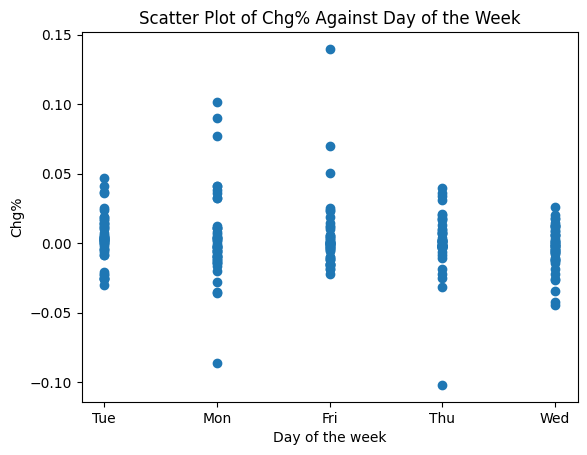

In [11]:
# importing matplotlib.pyplot for making the graphs like bar-graph, etc.
import matplotlib.pyplot as plt

#ploting scatter plot using data chg% and Day
plt.scatter(x = 'Day', y = 'Chg%', data = IRCTC_Stock_Price)

# Add labels and title
plt.xlabel('Day of the week')
plt.ylabel('Chg%')
plt.title('Scatter Plot of Chg% Against Day of the Week')
plt.show()


**A5**

In [12]:
#Taking the data-set from thyroid0387_UCI  
thyroid0387_UCI_data =  dataframe['thyroid0387_UCI']
print('Data-set before nan.')
print(thyroid0387_UCI_data.head(10))

#filling nan inplace of '?'
thyroid0387_UCI_data.replace('?', np.nan, inplace=True)

print('Data set after nan')
print(thyroid0387_UCI_data.head(10))

Data-set before nan.
   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   
5  840803048   60   F            f                  f   
6  840803068   77   F            f                  f   
7  840807019   28   F            f                  f   
8  840808060   28   F            f                  f   
9  840808073   28   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f

/tmp/ipykernel_25187/3539252157.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid0387_UCI_data.replace('?', np.nan, inplace=True)


**Study each attribute and associated values present. Identify the datatype (nominal etc.)
for the attribute.**

In [13]:
# Display the data types of each column
print(thyroid0387_UCI_data.dtypes)


Record ID                      int64
age                            int64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
T

**For categorical attributes, identify the encoding scheme to be employed. (Guidance:
employ label encoding for ordinal variables while One-Hot encoding may be employed
for nominal variables).**

**Study the data range for numeric variables.**

In [14]:
# Display range (min, max) for numeric variables
numeric_data_column =  thyroid0387_UCI_data.select_dtypes(include = ['float64', 'int64']).columns

#Displaying the numeric column
print(numeric_data_column)
print()

#displaying the range of numberic variable i.e min & max
print(thyroid0387_UCI_data[numeric_data_column].describe().loc[['min', 'max']])

Index(['Record ID', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], dtype='object')

       Record ID      age      TSH     T3    TT4   T4U    FTI    TBG
min  840801013.0      1.0    0.005   0.05    2.0  0.17    1.4    0.1
max  870119035.0  65526.0  530.000  18.00  600.0  2.33  881.0  200.0


**Study the presence of missing values in each attribute.**

In [15]:
# Check for missing values in each column
missing_val = thyroid0387_UCI_data.isnull().sum()
print(missing_val)


Record ID                       0
age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                          8823
referral sourc

**Study presence of outliers in data.**

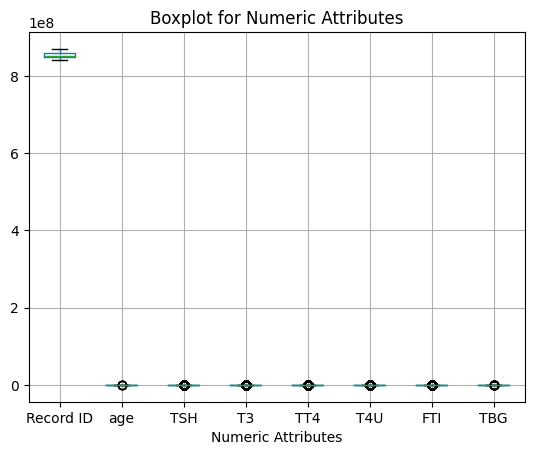

In [16]:
import matplotlib.pyplot as plt

# Plot box plot for each numeric column to check for outliers
thyroid0387_UCI_data[numeric_data_column].boxplot()
plt.xlabel('Numeric Attributes')
plt.title("Boxplot for Numeric Attributes")
plt.show()

**For numeric variables, calculate the mean and variance (or standard deviation).**

In [17]:
# Calculate the mean and standard deviation for numeric variables

#Calculate the mean 
mean_value = thyroid0387_UCI_data[numeric_data_column].mean()

#Calculate the variance 
variance_value = thyroid0387_UCI_data[numeric_data_column].std()

print(f"Mean values : \n{mean_value}")
print()
print(f"Standard deviation values : \n {variance_value}")
print()

Mean values : 
Record ID    8.529473e+08
age          7.355582e+01
TSH          5.218403e+00
T3           1.970629e+00
TT4          1.087003e+02
T4U          9.760557e-01
FTI          1.136407e+02
TBG          2.987006e+01
dtype: float64

Standard deviation values : 
 Record ID    7.581969e+06
age          1.183977e+03
TSH          2.418401e+01
T3           8.875788e-01
TT4          3.752267e+01
T4U          2.003604e-01
FTI          4.155165e+01
TBG          2.108050e+01
dtype: float64



**A6**

In [18]:
# Identify numerical and categorical columns
num_cols = thyroid0387_UCI_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = thyroid0387_UCI_data.select_dtypes(include=['object']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return (series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))

# Impute missing values for numerical columns
for col in num_cols:
    if thyroid0387_UCI_data[col].isnull().sum() > 0:
        # Check for outliers
        has_outliers = detect_outliers_iqr(thyroid0387_UCI_data[col])
        
        if has_outliers.any():
            # Impute with median if outliers are present
            thyroid0387_UCI_data[col].fillna(thyroid0387_UCI_data[col].median(), inplace=True)
            print(f"Column: {col}, Imputation Method: Median")
        else:
            # Impute with mean if no outliers are present
            thyroid0387_UCI_data[col].fillna(thyroid0387_UCI_data[col].mean(), inplace=True)
            print(f"Column: {col}, Imputation Method: Mean")

# Impute missing values for categorical columns
for col in cat_cols:
    if thyroid0387_UCI_data[col].isnull().sum() > 0:
        mode_value = thyroid0387_UCI_data[col].mode()[0]
        thyroid0387_UCI_data[col].fillna(mode_value, inplace=True)
        print(f"Column: {col}, Imputation Method: Mode")

# Check for remaining missing values
missing_values_after_imputation = thyroid0387_UCI_data.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)





Column: TSH, Imputation Method: Median
Column: T3, Imputation Method: Median
Column: TT4, Imputation Method: Median
Column: T4U, Imputation Method: Median
Column: FTI, Imputation Method: Median
Column: TBG, Imputation Method: Median
Column: sex, Imputation Method: Mode
Missing values after imputation:
 Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4           

/tmp/ipykernel_25187/2848495166.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  thyroid0387_UCI_data[col].fillna(thyroid0387_UCI_data[col].median(), inplace=True)
/tmp/ipykernel_25187/2848495166.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

**A7**

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns
num_cols = thyroid0387_UCI_data.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Check value ranges to determine if normalization is needed
print("Before Normalization:")
print(thyroid0387_UCI_data[num_cols].describe())
print()
# Min-Max Normalization
min_max_scaler = MinMaxScaler()
thyroid0387_UCI_data[num_cols] = min_max_scaler.fit_transform(thyroid0387_UCI_data[num_cols])

# Verify normalization by checking the statistics again
print("After Normalization with Min-Max scaling :")
print(thyroid0387_UCI_data[num_cols].describe())


Before Normalization:
          Record ID           age          TSH           T3          TT4  \
count  9.172000e+03   9172.000000  9172.000000  9172.000000  9172.000000   
mean   8.529473e+08     73.555822     4.867869     1.950577   108.473796   
std    7.581969e+06   1183.976718    23.073462     0.751748    36.621135   
min    8.408010e+08      1.000000     0.005000     0.050000     2.000000   
25%    8.504090e+08     37.000000     0.590000     1.700000    88.000000   
50%    8.510040e+08     55.000000     1.400000     1.900000   104.000000   
75%    8.607110e+08     68.000000     2.500000     2.200000   124.000000   
max    8.701190e+08  65526.000000   530.000000    18.000000   600.000000   

               T4U          FTI          TBG  
count  9172.000000  9172.000000  9172.000000  
mean      0.974640   113.234959    26.147258  
std       0.191373    39.714898     4.172634  
min       0.170000     1.400000     0.100000  
25%       0.870000    95.000000    26.000000  
50%       0